<class 'pandas.core.frame.DataFrame'>


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino
5,15,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14,8,454,220,4354,9.0,70,1,chevrolet impala
7,14,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14,8,455,225,4425,10.0,70,1,pontiac catalina
9,15,8,390,190,3850,8.5,70,1,amc ambassador dpl


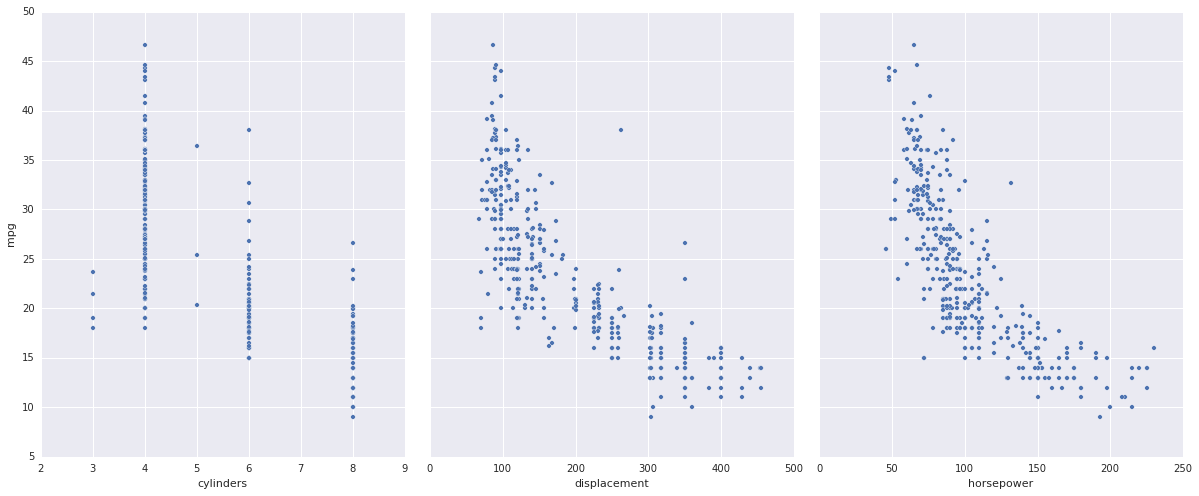

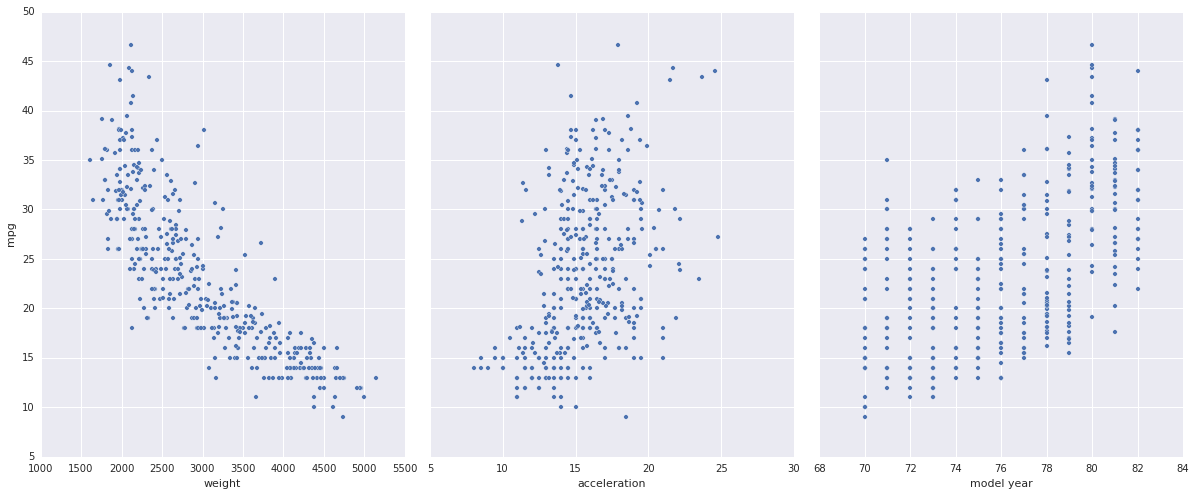

In [383]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
%matplotlib inline

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
dataNames = [ 'mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','car name']
data = pd.read_csv(url, sep=r"\s+", header = None, names = dataNames)
print type(data)
#data = data.drop_duplicates()
#data_dropna = data.dropna()
data.dropna(inplace=True)
display(data)
sns.pairplot(data, x_vars=['cylinders','displacement','horsepower'], y_vars='mpg', size=7, aspect=0.8)
sns.pairplot(data, x_vars=['weight','acceleration','model year'], y_vars='mpg', size=7, aspect=0.8)

In [318]:
# 23
from sklearn.preprocessing import PolynomialFeatures
data_sub = data.iloc[:,:7]
poly = PolynomialFeatures(2,interaction_only=False)
X_pro = poly.fit_transform(X)
print X_pro
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_pro)
X_nor = scaler.transform(X_pro)
print X_nor

#La nouvelle matrice a des variables explicatives non seulement d'ordre une, et aussi ordre deux.

[[ 1.          1.48394702  1.07728956 ...,  1.65188814  2.08894954
   2.64164993]
 [ 1.          1.48394702  1.48873169 ...,  2.15127818  2.38388839
   2.64164993]
 [ 1.          1.48394702  1.1825422  ...,  2.71652776  2.67882724
   2.64164993]
 ..., 
 [ 1.         -0.86401356 -0.56847897 ...,  2.04613141 -2.34077025
   2.6778365 ]
 [ 1.         -0.86401356 -0.7120053  ...,  1.23229566  1.81655892
   2.6778365 ]
 [ 1.         -0.86401356 -0.72157372 ...,  1.96121292  2.29168225
   2.6778365 ]]
[[ 0.          1.48394702  1.07728956 ...,  0.41876238  1.7022124
   1.79964325]
 [ 0.          1.48394702  1.48873169 ...,  0.73956246  1.98134019
   1.79964325]
 [ 0.          1.48394702  1.1825422  ...,  1.10266964  2.26046797
   1.79964325]
 ..., 
 [ 0.         -0.86401356 -0.56847897 ...,  0.67201788 -2.49003925
   1.83931243]
 [ 0.         -0.86401356 -0.7120053  ...,  0.14922297  1.44442408
   1.83931243]
 [ 0.         -0.86401356 -0.72157372 ...,  0.61746762  1.89407703
   1.83931243]]


#other

In [234]:
# centre tout; LinearRegression()
from sklearn import preprocessing

# Centrer et reduire:
data_sub = data.iloc[:,:7]
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(data_sub)
data_uni = scaler.transform(data_sub)
#print data_uni
# Créer X:
X = data_uni[:,1:]
#X = sm.add_constant(X)    #?
print X.shape
#display(X)
# Créer y:
y = data_uni[:,0]
print y.shape
#display(y)
# Calculate the least squares estimator
#results = sm.OLS(y, X).fit().params
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.coef_.shape
fit_pairs = zip(feature_cols, linreg.coef_)
display(fit_pairs)

(392, 6)
(392,)
(6,)


[('cylinders', -0.072090655791224201),
 ('displacement', 0.10294694602680471),
 ('horsepower', -0.0019300083960403797),
 ('weight', -0.7394439864489375),
 ('acceleration', 0.030141841853979497),
 ('model year', 0.3555673989489761)]

In [423]:
# centre x; LinearRegression()
data_sub = data.iloc[:,:7]
# X
X_row = data_sub.iloc[:,1:]
print type(X)
print X.shape
# Centrer et reduire:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_row)
X = scaler.fit_transform(X_row)
# y
y = data.iloc[:,0].as_matrix()

print y.shape
linreg = LinearRegression()
lin = linreg.fit(X, y)
fit_pairs = zip(feature_cols, linreg.coef_)
display(fit_pairs)

# Predict y
y_pred = linreg.predict(X)
linreg.intercept_

<type 'numpy.ndarray'>
(392, 6)
(392,)


[('cylinders', -0.56194996095439431),
 ('displacement', 0.80247615540735828),
 ('horsepower', -0.015044503769494746),
 ('weight', -5.763999713309909),
 ('acceleration', 0.23495703662331247),
 ('model year', 2.7716641465252834)]

23.445918367346941

In [424]:
x_raw = np.array([6,225,100,3233,15.4,76])
X_test = scaler.transform(x_raw)
y_res = linreg.predict(X_test)
y_res

/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 21.77622018])

In [315]:
x_row = np.array([6,225,100,3233,15.4,76])
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(x_row)
x = scaler.transform(x_row)
print x
result = np.dot(lin.T,x)
result

[-0.51313549 -0.32684494 -0.43317516  2.23188561 -0.50513946 -0.45359056]


/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


AttributeError: 'LinearRegression' object has no attribute 'T'

In [281]:
r_sq = np.square(np.linalg.norm(np.subtract(y,y_pred)))
n,p = X.shape
r_sqN = r_sq/(n-p)
print r_sq
Id_n = np.ones(n)
print type(np.mean(y))
left = np.square(np.linalg.norm(np.subtract(y, np.mean(y)*Id_n)))
right = r_sq + np.square(np.linalg.norm(np.subtract(y_pred, np.mean(y)*Id_n)))
print left
print right
print y.shape
print Id_n.shape
# print np.mean(y)*Id_n.shape


4543.34702471
<type 'numpy.float64'>
23818.9934694
23818.9934694
(392,)
(392,)


#blank

In [415]:
n = data.shape[0]
p = 9
X = np.zeros((n,p))
# Divide data_sub into two parts:
# data_sub1 : to be normolized
# data_sub2 : remain unchanged
data_sub1 = data.iloc[:,1:7]
data_sub2 = data.iloc[:,7:8]
data_sub2["origin"] = data_sub2["origin"].astype("category")
data_sub2 = pd.get_dummies(data_sub2)
# Centrer et reduire:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(data_sub1)
data_sub1 = scaler.transform(data_sub1)

data_sub2 = data_sub2.as_matrix()
# Create new matrix X
X[:,:6] = data_sub1
X[:,6:] = data_sub2
# y
y = data.iloc[:,0].as_matrix()
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)
print("The coefficients of 'usa', 'europe' and 'japan' are:")
print linreg.coef_


The coefficients of 'usa', 'europe' and 'japan' are:
[ -0.83427197   2.50601874  -0.69900932  -5.69254264   0.21795599
   2.85870923  22.41468064  25.044683    25.26790886]


####25

In [460]:
# Get the colomn with car name
data_sub3 = data.iloc[:,8:9]
array = data_sub3.as_matrix()
n = data_sub3.shape[0]
print n
# Create an empty array of string
brand = ["" for x in range(n)]
for i in range(0,n):
    brand[i] = array[i][0].split(' ',1)[0]

print type(brand)
print brand


392
<type 'list'>
['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'ford', 'chevrolet', 'plymouth', 'pontiac', 'amc', 'dodge', 'plymouth', 'chevrolet', 'buick', 'toyota', 'plymouth', 'amc', 'ford', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'amc', 'ford', 'chevy', 'dodge', 'hi', 'datsun', 'chevrolet', 'toyota', 'amc', 'plymouth', 'chevrolet', 'ford', 'amc', 'chevrolet', 'pontiac', 'ford', 'plymouth', 'dodge', 'ford', 'pontiac', 'amc', 'chevrolet', 'pontiac', 'ford', 'mercury', 'opel', 'peugeot', 'fiat', 'toyota', 'datsun', 'volkswagen', 'plymouth', 'toyota', 'dodge', 'volkswagen', 'chevrolet', 'ford', 'chevrolet', 'pontiac', 'plymouth', 'ford', 'amc', 'mercury', 'buick', 'oldsmobile', 'chrysler', 'mazda', 'amc', 'chevrolet', 'ford', 'plymouth', 'volvo', 'volkswagen', 'peugeot', 'renault', 'ford', 'datsun', 'toyouta', 'dodge', 'toyota', 'buick', 'amc', 'chevrolet', 'ford', 'dodge', 'mercury', 'chevrolet', 'ford', 'plymouth', 'chrysler', 'buick', 'amc', 'plymouth', 'chevr

####26

In [422]:
X_data = data.iloc[:,1:7].as_matrix()
U,s,V_T = np.linalg.svd(X_data, full_matrices=False,compute_uv=1)


#test

NameError: name 'DataFrame' is not defined